<a href="https://colab.research.google.com/github/Radha-12/AI_ML/blob/main/Supervised_Learning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Supervised Learning Project**

**▶ PART - A**

**1. Data Understanding**

In [ ]:
# Import Neccessary libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# To read all the 3 CSV files as DataFrame and store them into 3 separate variables.
normal = pd.read_csv('/content/drive/MyDrive/AI /Dec AI/Project - Supervised Learning/Part1+-+Normal.csv')
type_h = pd.read_csv('/content/drive/MyDrive/AI /Dec AI/Project - Supervised Learning/Part1+-+Type_S.csv')
type_s = pd.read_csv('/content/drive/MyDrive/AI /Dec AI/Project - Supervised Learning/Part1+-+Type_H.csv')

In [ ]:
# To get the shapes of 3 dataframes
print(normal.shape)
print(type_s.shape)
print(type_h.shape)

(100, 7)
(60, 7)
(150, 7)


In [ ]:
# Compare the column names of the 3 dataframes

In [ ]:
if set(normal.columns) == set(type_s.columns) == set(type_h.columns):
    print("All three DataFrames have same columns")
else:
    print("Some difference in one of the DataFrames")

All three DataFrames have same columns


All the three Dataframes are having same columns, hence can be concatenated

In [ ]:
# To get the datatypes of 3 dataframes
print(normal.dtypes)
print(type_s.dtypes)
print(type_h.dtypes)

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object
P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object
P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object


In [ ]:
# To check the variations in 'Class' features of 3 dataframes
print(normal['Class'].value_counts())
print('*****')
print(type_s['Class'].value_counts())
print('*****')
print(type_h['Class'].value_counts())
print('*****')

Normal    73
Nrmal     27
Name: Class, dtype: int64
*****
Type_H    37
type_h    23
Name: Class, dtype: int64
*****
Type_S    133
tp_s       17
Name: Class, dtype: int64
*****


**Observations:**

Two values with same meaning are observed from each Class. Hence, need to be made into a single value for further process.

**2. Data Preparation and Exploration**

In [ ]:
# Unify all the variations in ‘Class’ feature

In [ ]:
normal['Class'] = normal['Class'].apply(lambda x: 'normal')
type_s['Class'] = type_s['Class'].apply(lambda x: 'type_s')
type_h['Class'] = type_h['Class'].apply(lambda x: 'type_h')


In [ ]:
# Combine all the 3 DataFrames to form a single DataFrame
df = normal.append([type_h,type_s])

<ipython-input-890-7787fe3be033>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = normal.append([type_h,type_s])


In [ ]:
df.shape # To get no.of rows and no.of columns of the dataframe

(310, 7)

In [ ]:
df['Class'].value_counts() # To get the no.of instances for three classes each

type_h    150
normal    100
type_s     60
Name: Class, dtype: int64

In [ ]:
# To Print 5 random samples of this DataFrame
df.sample(5)

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
117,80.817771,19.238981,61.642451,61.578791,89.471834,44.167602,type_h
38,77.655119,22.432950,93.892779,55.222169,123.055707,61.211187,type_h
77,83.396606,34.310989,78.423293,49.085617,110.466516,49.672096,type_h
85,46.426366,6.620795,48.100000,39.805571,130.350096,2.449382,normal
122,75.437748,31.539454,89.600000,43.898294,106.829590,54.965789,type_h


In [ ]:
# Print Feature-wise percentage of Null values
df.isna().sum()/len(df)

P_incidence    0.0
P_tilt         0.0
L_angle        0.0
S_slope        0.0
P_radius       0.0
S_Degree       0.0
Class          0.0
dtype: float64

In [ ]:
# To check 5-point summary of the new dataframe i.e 'df'
df.describe()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


<Axes: >

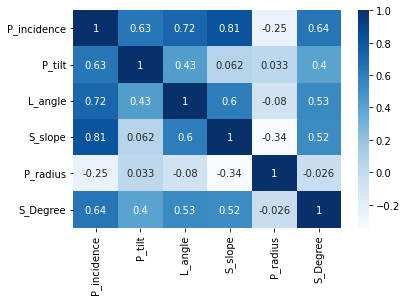

In [ ]:
# To visualize a heatmap to understand correlation between all features
sns.heatmap(df.corr(),cmap='Blues',annot=True)

- S_slope and P_incidence is having stronger positive correlation i.e. 0.81.
- L_angle and P_incidence is having stronger positive correlation i.e. 0.72.
- P_tilt is having weaker correlation with S_Slope and P_radius respectively with values 0.062 and 0.033.

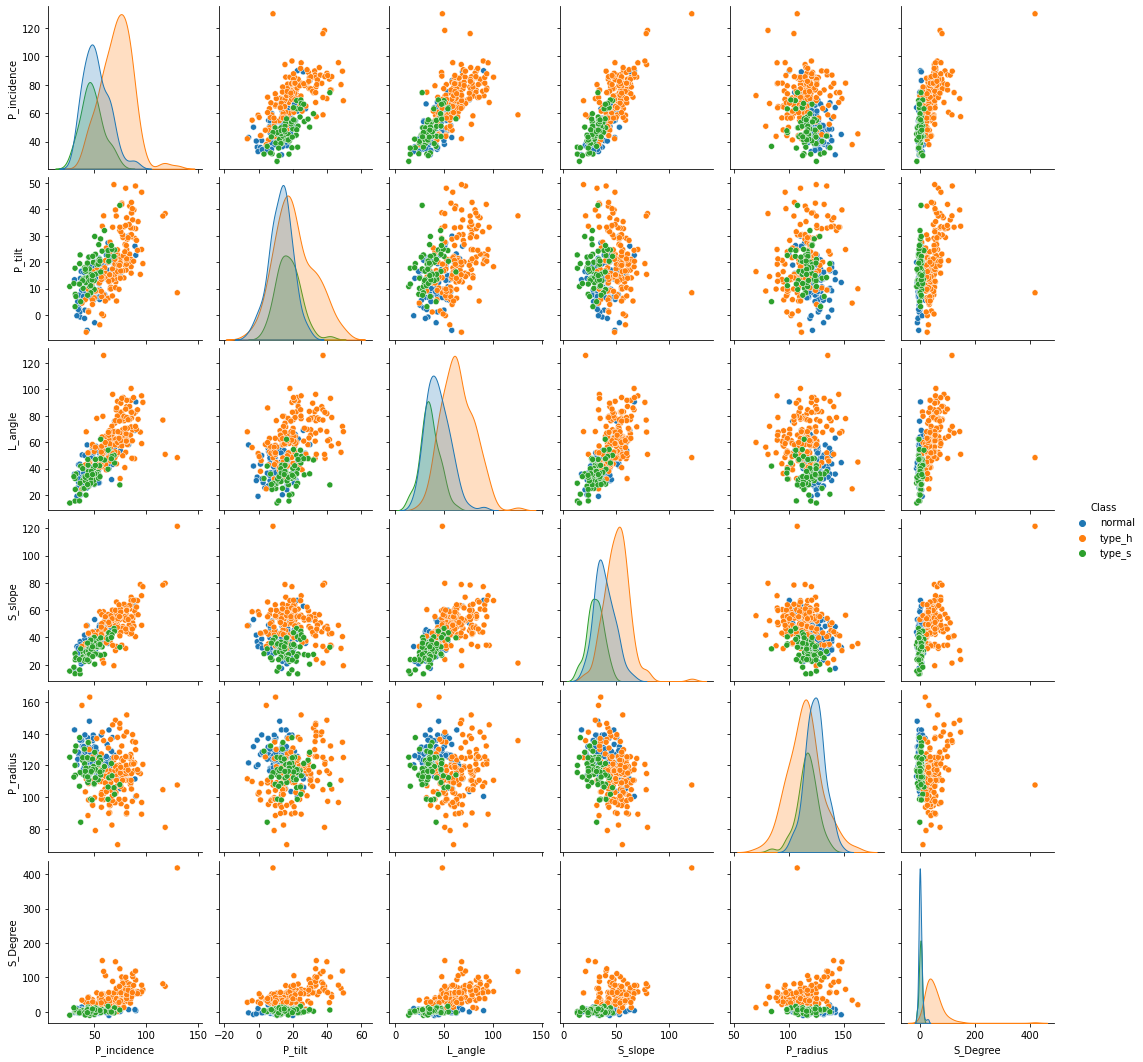

In [ ]:
# To visualize the pairplot for 3 classes distinguished by colors
sns.pairplot(df,hue='Class')

**Observations**
- Normal distribution is observed for all the 3 classes separately for all the features except S_Degree, etc.
- type_h datapoints are observed to have higher values for all the features.

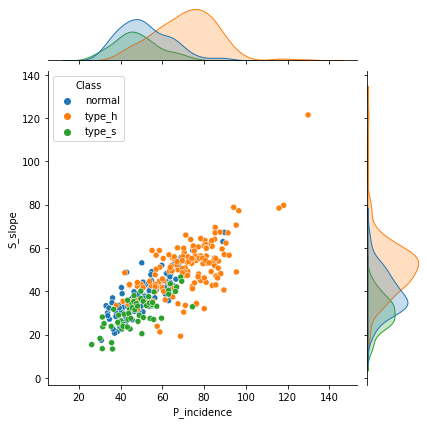

In [ ]:
# To visualize a jointplot for ‘P_incidence’ and ‘S_slope’
sns.jointplot(x = "P_incidence", y = "S_slope", data = df, hue=df['Class'])

**Observations**
- P_incidence and S_slope are having strong linear relationship(i.e positive).
- Skewness is observed in both the cases for all the 3 classes separately.

In [ ]:
df.columns # To get the column names of the dataframe

Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')

<Axes: xlabel='Class', ylabel='S_slope'>

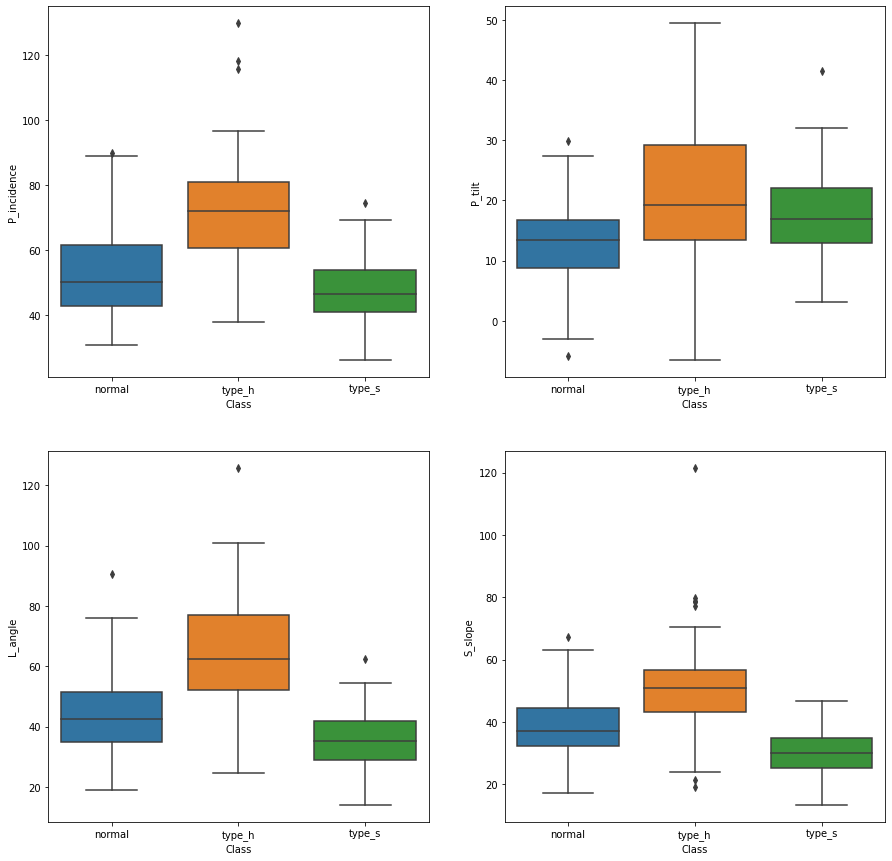

In [ ]:
# To visualize a boxplot to check distribution of the features 'P_incidence', 'P_tilt', 'L-angle', 'S_slope'

f, axes = plt.subplots(2, 2)
f.set_figheight(15)
f.set_figwidth(15)
sns.boxplot(  y="P_incidence", x= "Class", data=df,  orient='v' , ax=axes[0][0])
sns.boxplot(  y="P_tilt", x= "Class", data=df,  orient='v' , ax=axes[0][1])
sns.boxplot(  y="L_angle", x= "Class", data=df,  orient='v' , ax=axes[1][0])
sns.boxplot(  y="S_slope", x= "Class", data=df,  orient='v' , ax=axes[1][1])

 * Outliers observed in the features: S_slope, P_incidence

In [ ]:
# Using groupby to get the count values of three clases i.e 'normal', 'Type_s' & 'Type_h' from the data column wise
df.groupby(["Class"]).count()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
Class,,,,,,
normal,100,100,100,100,100,100
type_h,150,150,150,150,150,150
type_s,60,60,60,60,60,60


In [ ]:
# To split data into X and Y
# Create a separate dataframe consisting only of the features i.e independent attributes
X = df.drop('Class',axis=1)
y = df['Class']
X.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910


In [ ]:
# To split data into train and test with 80:20 proportion

x_train, x_test,y_train,y_test = train_test_split(X,y,random_state=67,test_size=.2)

**Build KNN Model**

In [ ]:
knn = KNeighborsClassifier() # To build knn model

In [ ]:
knn.fit(x_train,y_train) # To call Nearest Neighbour algorithm

KNeighborsClassifier()

**Evaluate Performance Of KNN Model**

In [ ]:
train_pred = knn.predict(x_train) # To predict the train responses
test_pred = knn.predict(x_test) # To predict the test responses

In [ ]:
print("Train Accuracy is: ",accuracy_score(y_train,train_pred))
print('*'*20)
print("Testing Accuracy is: ",accuracy_score(y_test,test_pred))
print('*'*20)
print("Training metrics: \n",classification_report(y_train,train_pred))
print('*'*20)
print("Testing metrics: \n",classification_report(y_test,test_pred))
print('*'*20)

Train Accuracy is:  0.9032258064516129
********************
Testing Accuracy is:  0.8225806451612904
********************
Training metrics: 
               precision    recall  f1-score   support

      normal       0.82      0.91      0.86        82
      type_h       0.98      0.97      0.97       121
      type_s       0.86      0.71      0.78        45

    accuracy                           0.90       248
   macro avg       0.89      0.86      0.87       248
weighted avg       0.91      0.90      0.90       248

********************
Testing metrics: 
               precision    recall  f1-score   support

      normal       0.74      0.78      0.76        18
      type_h       0.90      0.97      0.93        29
      type_s       0.75      0.60      0.67        15

    accuracy                           0.82        62
   macro avg       0.80      0.78      0.79        62
weighted avg       0.82      0.82      0.82        62

********************


**KNN Model**

In [ ]:
# Find the optimal number of neighbours

In [ ]:
# creating odd list of K for KNN
myList = list(range(2,50))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))
print(neighbors)

[3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49]


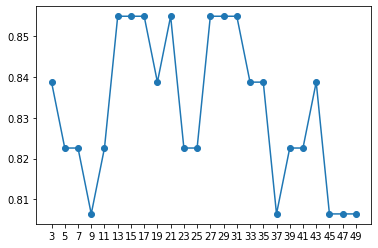

0.8064516129032258


In [ ]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in neighbors:
    knn1 = KNeighborsClassifier(n_neighbors=k)
    knn1.fit(x_train, y_train)

    # predict the response
    y_pred = knn1.predict(x_test)
    # evaluate accuracy
    scores = accuracy_score(y_test, y_pred)
    ac_scores.append(scores)

plt.plot(neighbors, ac_scores, 'o-')
plt.xticks(neighbors)
plt.show()
print(scores)

In [ ]:
# To find the MisClassification Error
MSE = [1 - x for x in ac_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 13


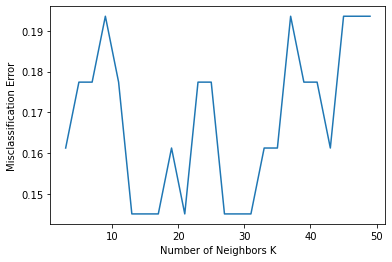

In [ ]:
#Plot misclassification error vs k (with k value on X-axis) using matplotlib.
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [ ]:
#Use k=13 as the final model for prediction
knn2 = KNeighborsClassifier(n_neighbors = 13, weights = 'distance',p=2)

# fitting the model
knn2.fit(x_train, y_train)

# predict the response
y_pred = knn2.predict(x_test)

# evaluate accuracy
print(accuracy_score(y_test, y_pred))

0.8548387096774194


In [ ]:
import sklearn.metrics as metrics
# To print Classification report for test responses
print("classification_report")
print(metrics.classification_report(y_test, y_pred))

classification_report
              precision    recall  f1-score   support

      normal       0.82      0.78      0.80        18
      type_h       0.91      1.00      0.95        29
      type_s       0.77      0.67      0.71        15

    accuracy                           0.85        62
   macro avg       0.83      0.81      0.82        62
weighted avg       0.85      0.85      0.85        62



Confusion Matrix


<Axes: >

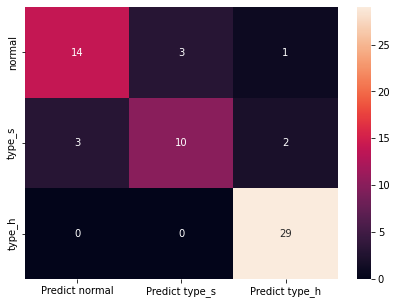

In [ ]:
# To calculate confusion matrix
from sklearn import metrics

predicted_labels = knn2.predict(x_test)
knn2.score(x_test, y_test)

print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, predicted_labels,labels=["normal","type_s","type_h"])

df_cm = pd.DataFrame(cm, index = [i for i in ["normal","type_s","type_h"]],
                  columns = [i for i in ["Predict normal","Predict type_s", "Predict type_h"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

**InSights:-**

**a) For Normal - Confusion Matrix**
- True Positives (TP): we correctly predicted condition of the patients with test results are 14

- True Negatives (TN): we correctly predicted condition of the patients without the test results 41

- False Positives (FP): we incorrectly predicted condition of the patients with test results are (a "Type I error") 3 Falsely predict positive Type I error

- False Negatives (FN): we incorrectly predicted condition of the patients without the test results (a "Type II error") 4 Falsely predict negative Type II error

**b) For type_s - Confusion Matrix**

- True Positives (TP): we correctly predicted condition of the patients with test results are 10

- True Negatives (TN): we correctly predicted condition of the patients without test results 44

- False Positives (FP): we incorrectly predicted condition of the patients with test results (a "Type I error") 3 Falsely predict positive Type I error

- False Negatives (FN): we incorrectly predicted condition of the patients without test results (a "Type II error") 5 Falsely predict negative Type II error

**c) For type_h - Confusion Matrix**

- True Positives (TP): we correctly predicted condition of the patients with test results are 29

- True Negatives (TN): we correctly predicted condition of the patients without test results 30

- False Positives (FP): we incorrectly predicted condition of the patients with test results (a "Type I error") 0 Falsely predict positive Type I error

- False Negatives (FN): we incorrectly predicted condition of the patients without test results (a "Type II error") 30 Falsely predict negative Type II error

In [ ]:
knn_score = knn.score(x_test, y_test)
print(knn_score)

pred = knn.predict(x_test)

0.8225806451612904


In [ ]:
def rightly_identified(actual, predictions):
    a = pd.DataFrame()  # empty dataframe

    for i in np.sort(actual.unique()):
        try:  # because we get a key error if we use value_counts()[i] when the given class i does not exist in the value_count() array
            a.loc[i,'total_instances'] = len(actual[actual == i]) # value count of a given class i
            a.loc[i, 'identified_right'] = pd.Series(predictions[actual == i]).value_counts()[i] # number of instances where a given class i was identified correctly
            a.loc[i, '%'] = round(100*pd.Series(predictions[actual == i]).value_counts()[i]/len(actual[actual == i]), 1)  # percentage of predictions that were correct for a given class
        except:  # if the key error discussed above occurs, assign the percentage = 0
            a.loc[i, '%'] = 0.0
    return a

In [ ]:
pred_vs_actual_knn = rightly_identified(y_test, pred)
pred_vs_actual_knn

,total_instances,identified_right,%
normal,18.0,14.0,77.8
type_h,29.0,28.0,96.6
type_s,15.0,9.0,60.0


**Observations-**

- Total Instances for the Normal data points are 18 and identified 14 as correct with 77.8%.
- Total Instances for the type_h data points are 29 and identified 28 as correct with 96.6%.
- Total Instances for the type_s data points are 15 and identified 9 as correct with 60%.

In [ ]:
def con_matrix(actual, predictions):
    from sklearn.metrics import confusion_matrix

    matrix = pd.DataFrame(confusion_matrix(actual, predictions), columns = np.unique(actual), index = np.unique(actual))
    # confusion_matrix() returns the confusion matrix. Wrapping this matrix in a dataframe with appropriate column names and index
    matrix.loc[:,'total_count_actual_class'] = matrix.sum(axis = 1)  # sum accross the columns
    matrix.loc['total_count_predicted'] = matrix.sum(axis = 0)  # row sum
    return matrix

In [ ]:
con_matrix(y_test, pred)

,normal,type_h,type_s,total_count_actual_class
normal,14,1,3,18
type_h,1,28,0,29
type_s,4,2,9,15
total_count_predicted,19,31,12,62


- For k=13, we found type_h is the dominated set among the three sets

**Using different Algorithms to improve the performance of the model:-**

- Picking k = 25, to get the better performance as per the plot (i.e from the MSE & K values)

**Ball_tree Algorithm:**

In [ ]:
# To build knn model with weights = 'distance'
knn_1 = KNeighborsClassifier(n_neighbors=25,algorithm='ball_tree',weights='distance',p=2)
knn_1.fit(x_train,y_train)
train_pred = knn_1.predict(x_train)
test_pred = knn_1.predict(x_test)

print("Train Accuracy is: ",accuracy_score(y_train,train_pred))
print('*'*20)
print("Testing Accuracy is: ",accuracy_score(y_test,test_pred))
print('*'*20)
print("Training metrics: \n",classification_report(y_train,train_pred))
print('*'*20)
print("Testing metrics: \n",classification_report(y_test,test_pred))
print('*'*20)

Train Accuracy is:  1.0
********************
Testing Accuracy is:  0.8225806451612904
********************
Training metrics: 
               precision    recall  f1-score   support

      normal       1.00      1.00      1.00        82
      type_h       1.00      1.00      1.00       121
      type_s       1.00      1.00      1.00        45

    accuracy                           1.00       248
   macro avg       1.00      1.00      1.00       248
weighted avg       1.00      1.00      1.00       248

********************
Testing metrics: 
               precision    recall  f1-score   support

      normal       0.72      0.72      0.72        18
      type_h       0.94      1.00      0.97        29
      type_s       0.69      0.60      0.64        15

    accuracy                           0.82        62
   macro avg       0.78      0.77      0.78        62
weighted avg       0.81      0.82      0.82        62

********************


**InSights:**
- Training accuracy has gone up by 10%
- Testing Precision and recall values of type_h increased by 4% by compromising 'type_s' and 'normal'

**kd_tree Algorithm:**

In [ ]:
# To build knn model with weights = 'distance'
knn_2 = KNeighborsClassifier(n_neighbors=25,algorithm='kd_tree',weights='distance',p=2)
knn_2.fit(x_train,y_train)
train_pred = knn_2.predict(x_train)
test_pred = knn_2.predict(x_test)

print("Train Accuracy is: ",accuracy_score(y_train,train_pred))
print('*'*20)
print("Testing Accuracy is: ",accuracy_score(y_test,test_pred))
print('*'*20)
print("Training metrics: \n",classification_report(y_train,train_pred))
print('*'*20)
print("Testing metrics: \n",classification_report(y_test,test_pred))
print('*'*20)

Train Accuracy is:  1.0
********************
Testing Accuracy is:  0.8225806451612904
********************
Training metrics: 
               precision    recall  f1-score   support

      normal       1.00      1.00      1.00        82
      type_h       1.00      1.00      1.00       121
      type_s       1.00      1.00      1.00        45

    accuracy                           1.00       248
   macro avg       1.00      1.00      1.00       248
weighted avg       1.00      1.00      1.00       248

********************
Testing metrics: 
               precision    recall  f1-score   support

      normal       0.72      0.72      0.72        18
      type_h       0.94      1.00      0.97        29
      type_s       0.69      0.60      0.64        15

    accuracy                           0.82        62
   macro avg       0.78      0.77      0.78        62
weighted avg       0.81      0.82      0.82        62

********************


**InSights:**
- Training accuracy has gone up by 10%
- Testing Precision and recall values of type_h increased by 4% by compromising 'type_s' and 'normal'

**Brute_force Algorithm:**

In [ ]:
# To build knn model with weights = 'distance'
knn_3 = KNeighborsClassifier(n_neighbors=25,algorithm='kd_tree',weights='distance',p=2)
knn_3.fit(x_train,y_train)
train_pred = knn_3.predict(x_train)
test_pred = knn_3.predict(x_test)

print("Train Accuracy is: ",accuracy_score(y_train,train_pred))
print('*'*20)
print("Testing Accuracy is: ",accuracy_score(y_test,test_pred))
print('*'*20)
print("Training metrics: \n",classification_report(y_train,train_pred))
print('*'*20)
print("Testing metrics: \n",classification_report(y_test,test_pred))
print('*'*20)

Train Accuracy is:  1.0
********************
Testing Accuracy is:  0.8225806451612904
********************
Training metrics: 
               precision    recall  f1-score   support

      normal       1.00      1.00      1.00        82
      type_h       1.00      1.00      1.00       121
      type_s       1.00      1.00      1.00        45

    accuracy                           1.00       248
   macro avg       1.00      1.00      1.00       248
weighted avg       1.00      1.00      1.00       248

********************
Testing metrics: 
               precision    recall  f1-score   support

      normal       0.72      0.72      0.72        18
      type_h       0.94      1.00      0.97        29
      type_s       0.69      0.60      0.64        15

    accuracy                           0.82        62
   macro avg       0.78      0.77      0.78        62
weighted avg       0.81      0.82      0.82        62

********************


**InSights:**
- Training accuracy has gone up by 10%
- Testing Precision and recall values of type_h increased by 4% by compromising 'type_s' and 'normal'

**Overall Observations:**

1. Training accuracy has gone up by 10%
2. Testing Precision and recall values of type_h increased by 4% by compromising 'type_s' and 'normal'

**Parameters contributed most to improve model performance:**

- Parameter 'weights' = 'distance' is the best parameter in improving training accuracy
- When 'weights' = 'distance' has higher influence of neighboring datapoints instead of uniform resulting into better predictions.

**▶ PART - B**

**Data Understanding**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# To read all the 2 CSV files as DataFrame and store them into 2 separate variables.
df1 = pd.read_csv('/content/drive/MyDrive/AI /Dec AI/Project - Supervised Learning/Part2+-+Data1.csv')
df2 = pd.read_csv('/content/drive/MyDrive/AI /Dec AI/Project - Supervised Learning/Part2+-Data2.csv')

In [ ]:
# To get the datatypes of two dataframes

In [ ]:
print(df1.dtypes)
print('-'*30)
print(df2.dtypes)

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
dtype: object
------------------------------
ID                       int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object


All of the features are int values except 'MonthlyAverageSpend'and 'LoanOnCard' features having floating point values

In [ ]:
# Combine all the 2 DataFrames to form a single DataFrame
df = pd.merge(df1, df2,on='ID')

NameError: ignored

In [ ]:
# To change the datatypes of the following features: 'CreditCard’, ‘InternetBanking’, ‘FixedDepositAccount’, ‘Security’, ‘Level’, ‘HiddenScore’ to 'Object/Str'.

lst_key = ['CreditCard','InternetBanking','FixedDepositAccount','Security','Level','HiddenScore']
lst_val = ['object']*len(lst_key)

In [ ]:
data_dict = {lst_key[i]: lst_val[i] for i in range(len(lst_key))}

In [ ]:
data_dict

{'CreditCard': 'object',
 'InternetBanking': 'object',
 'FixedDepositAccount': 'object',
 'Security': 'object',
 'Level': 'object',
 'HiddenScore': 'object'}

In [ ]:
df = df.astype(data_dict) # To change the datatype 'int64' to 'object'for the above 6 features

In [ ]:
df.shape

(5000, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   object 
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   object 
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   object 
 10  FixedDepositAccount  5000 non-null   object 
 11  InternetBanking      5000 non-null   object 
 12  CreditCard           5000 non-null   object 
 13  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(6), object(6)
memory usage: 585.9+ KB


- There are '20' null values that need to be treated in LoanOnCard Column i.e 0.4% Null values in LoanOnCard
- Features having int values are ID,Age,CustomerSince,HighestSpend,ZipCode,Mortage.
- Features having floating point values are MonthlyAverageSpend and LoanOnCard.
- Features having object values are HiddenScore,Level,Security,FixedDepositAccount,InternetBanking,CreditCard.
- We have 500 instances and 14 columns with memory usage is 585.9+ kB.

**Data Exploration**

<Axes: >

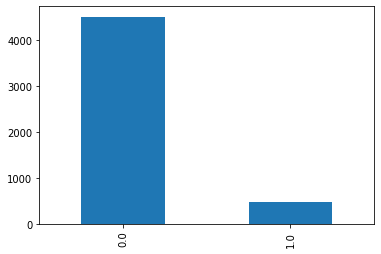

In [ ]:
df['LoanOnCard'].value_counts().plot(kind='bar')

 Data is highly imbalanced towards 'No'

In [ ]:
# Print Feature-wise percentage of Null values
df.isna().sum()/len(df)*100

ID                     0.0
Age                    0.0
CustomerSince          0.0
HighestSpend           0.0
ZipCode                0.0
HiddenScore            0.0
MonthlyAverageSpend    0.0
Level                  0.0
Mortgage               0.0
Security               0.0
FixedDepositAccount    0.0
InternetBanking        0.0
CreditCard             0.0
LoanOnCard             0.4
dtype: float64

There are '20' null values that need to be treated in LoanOnCard Column i.e 0.4% Null values in LoanOnCard

In [ ]:
# Dropping the null values
df.dropna(inplace=True)

In [ ]:
# Print Feature-wise percentage of Null values
df.isna().sum()/len(df)*100

ID                     0.0
Age                    0.0
CustomerSince          0.0
HighestSpend           0.0
ZipCode                0.0
HiddenScore            0.0
MonthlyAverageSpend    0.0
Level                  0.0
Mortgage               0.0
Security               0.0
FixedDepositAccount    0.0
InternetBanking        0.0
CreditCard             0.0
LoanOnCard             0.0
dtype: float64

There are no null values that need to be treated.

In [ ]:
# To change the values of the expected values like ‘?’, ‘a’, 1.5 in all the features to 0/1

In [ ]:
col_list = df.select_dtypes(include='object').columns

In [ ]:
# Using for loop, for getting all the unique values of the features each
for i in col_list:
    print('Unique values in {} are \n'.format(i),df[i].value_counts())
    print(i)
    print('*'*20)

Unique values in HiddenScore are 
 1    1466
2    1293
4    1215
3    1006
Name: HiddenScore, dtype: int64
HiddenScore
********************
Unique values in Level are 
 1    2089
3    1496
2    1395
Name: Level, dtype: int64
Level
********************
Unique values in Security are 
 0    4460
1     520
Name: Security, dtype: int64
Security
********************
Unique values in FixedDepositAccount are 
 0    4678
1     302
Name: FixedDepositAccount, dtype: int64
FixedDepositAccount
********************
Unique values in InternetBanking are 
 1    2974
0    2006
Name: InternetBanking, dtype: int64
InternetBanking
********************
Unique values in CreditCard are 
 0    3514
1    1466
Name: CreditCard, dtype: int64
CreditCard
********************


There are no unexpected values that are need to be treated.


**Data Preparation**

In [ ]:
# To split data into X and Y
# Create a separate dataframe consisting only of the features i.e independent attributes
X = df.drop(['LoanOnCard','ID','ZipCode'],axis=1) # To drop 'LoanOnCard' , 'ID' , 'ZipCode'
y = df['LoanOnCard']

In [ ]:
# To split data into train and test with 75:25 proportion
x_train, x_test, y_train, y_test = train_test_split(X,y,random_state = 90,test_size=0.25)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
x_train.head() # To get first 5 rows of the dataframe

,Age,CustomerSince,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard
3981,64,39,22,3,0.50,1,0,1,1,1,1
1270,43,18,60,2,2.20,3,0,0,0,0,1
1336,36,12,42,1,1.33,1,0,0,0,1,0
2123,28,2,9,1,0.10,2,0,0,0,1,0
1808,55,31,50,4,1.50,1,0,0,0,1,0


In [ ]:
lr = LogisticRegression() # Using Logistic Regression model
lr.fit(x_train,y_train) # To fit the model


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
train_pred = lr.predict(x_train) # To predict the train responses
test_pred = lr.predict(x_test) # To predict the test responses

In [ ]:
test_pred.shape # To get the no.of instances of test_pred

(1245,)

In [ ]:
y_test.shape # To get the no. of instances of y_test

(1245,)

In [ ]:
print(classification_report(y_train,train_pred)) # To get the classification report for the train responses

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      3375
         1.0       0.81      0.60      0.69       360

    accuracy                           0.95      3735
   macro avg       0.88      0.79      0.83      3735
weighted avg       0.94      0.95      0.94      3735



In [ ]:
print(classification_report(y_test,test_pred)) # To get the classification report for the test responses

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98      1125
         1.0       0.93      0.59      0.72       120

    accuracy                           0.96      1245
   macro avg       0.95      0.79      0.85      1245
weighted avg       0.96      0.96      0.95      1245



It is observed that accuracy is more but precision and recall values are on lower side for event 1.

**Oversampling & Undersampling Algorithms**

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [ ]:
undersample = RandomUnderSampler(sampling_strategy=0.5) # Balancing target variable with 50:50
oversample = RandomOverSampler(sampling_strategy='minority')

In [ ]:
X_under, y_under = undersample.fit_resample(X, y) # To fit the model

In [ ]:
X_under.shape

(1440, 11)

In [ ]:
y_under.shape

(1440,)

In [ ]:
y_under.value_counts() # To get the no.of instances for minority and majority classes seperately

0.0    960
1.0    480
Name: LoanOnCard, dtype: int64

In [ ]:
X_new,y_new = oversample.fit_resample(X_under,y_under)

In [ ]:
y_new.value_counts() # To get the no.of instances for minority and majority classes seperately

0.0    960
1.0    960
Name: LoanOnCard, dtype: int64

<Axes: title={'center': 'LoanOncard'}>

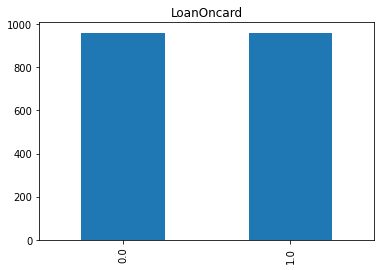

In [ ]:
y_new.value_counts().plot(kind='bar', title='LoanOncard') # To plot the no.of instances for minority and majority classes seperately

In [ ]:
# To train the data again with balanced data

x_train,x_test,y_train,y_test = train_test_split(X_new,y_new,test_size=0.25,random_state=87)

In [ ]:
lr.fit(x_train,y_train) # To fit the model
train_pred = lr.predict(x_train)
test_pred = lr.predict(x_test)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print('Training Metrics:')
print(classification_report(y_train,train_pred))

Training Metrics:
              precision    recall  f1-score   support

         0.0       0.91      0.89      0.90       725
         1.0       0.89      0.91      0.90       715

    accuracy                           0.90      1440
   macro avg       0.90      0.90      0.90      1440
weighted avg       0.90      0.90      0.90      1440



In [ ]:
print('Testing Metrics:')
print(classification_report(y_test,test_pred))

Testing Metrics:
              precision    recall  f1-score   support

         0.0       0.89      0.88      0.89       235
         1.0       0.89      0.90      0.89       245

    accuracy                           0.89       480
   macro avg       0.89      0.89      0.89       480
weighted avg       0.89      0.89      0.89       480



Accuracy, precision and recall are improved and close to each other after balancing the data

**Using Synthetic Minority Oversampling Technique(SMOTE) Oversampling:**

In [ ]:
# import library
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X_under, y_under)

y_smote.value_counts() # To get the no.of instances for minority and majority classes seperately

0.0    960
1.0    960
Name: LoanOnCard, dtype: int64

<Axes: title={'center': 'LoanOncard'}>

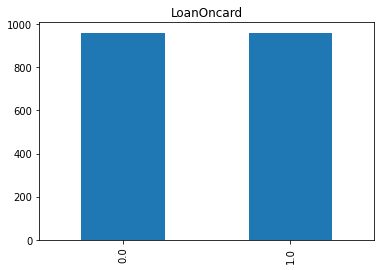

In [ ]:
y_smote.value_counts().plot(kind='bar', title='LoanOncard') # To plot the no.of instances for minority and majority classes seperately

In [ ]:
# To train the data again with balanced data

x_train,x_test,y_train,y_test = train_test_split(x_smote,y_smote,test_size=0.25,random_state=87)

In [ ]:
lr.fit(x_train,y_train) # To fit the model
train_pred = lr.predict(x_train)
test_pred = lr.predict(x_test)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print('Training Metrics:')
print(classification_report(y_train,train_pred))

Training Metrics:
              precision    recall  f1-score   support

         0.0       0.91      0.89      0.90       725
         1.0       0.89      0.92      0.90       715

    accuracy                           0.90      1440
   macro avg       0.90      0.90      0.90      1440
weighted avg       0.90      0.90      0.90      1440



In [ ]:
print('Testing Metrics:')
print(classification_report(y_test,test_pred))

Testing Metrics:
              precision    recall  f1-score   support

         0.0       0.90      0.89      0.90       235
         1.0       0.90      0.90      0.90       245

    accuracy                           0.90       480
   macro avg       0.90      0.90      0.90       480
weighted avg       0.90      0.90      0.90       480



Accuracy, precision and recall are improved and close to each other after balancing the data. Helps to overcome the overfitting problem posed by random oversampling.

**Performance Improvement:**

In [ ]:
# To import neccessary libraries

from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
def classify(classifier): # Using def for classifying the all classifiers models
    classifier.fit(x_train,y_train)
    pred_train = classifier.predict(x_train)
    pred_test = classifier.predict(x_test)
    print('Training Performace')
    print(classification_report(y_train,pred_train))
    print('*'*50)
    print('Testing Performace')
    print(classification_report(y_test,pred_test))


In [ ]:
svm = SVC() # Using SVM model
classify(svm)

Training Performace
              precision    recall  f1-score   support

         0.0       0.94      0.83      0.88       725
         1.0       0.85      0.95      0.89       715

    accuracy                           0.89      1440
   macro avg       0.89      0.89      0.89      1440
weighted avg       0.89      0.89      0.89      1440

**************************************************
Testing Performace
              precision    recall  f1-score   support

         0.0       0.89      0.83      0.85       235
         1.0       0.84      0.90      0.87       245

    accuracy                           0.86       480
   macro avg       0.86      0.86      0.86       480
weighted avg       0.86      0.86      0.86       480



In [ ]:
nb = GaussianNB() # Using Gaussian Naive Model
classify(nb)

Training Performace
              precision    recall  f1-score   support

         0.0       0.81      0.88      0.85       725
         1.0       0.87      0.79      0.83       715

    accuracy                           0.84      1440
   macro avg       0.84      0.84      0.84      1440
weighted avg       0.84      0.84      0.84      1440

**************************************************
Testing Performace
              precision    recall  f1-score   support

         0.0       0.79      0.90      0.84       235
         1.0       0.89      0.77      0.82       245

    accuracy                           0.83       480
   macro avg       0.84      0.83      0.83       480
weighted avg       0.84      0.83      0.83       480



In [ ]:
knn = KNeighborsClassifier() # Using KneighborsClassifier model
classify(knn)

Training Performace
              precision    recall  f1-score   support

         0.0       0.95      0.86      0.90       725
         1.0       0.87      0.96      0.91       715

    accuracy                           0.91      1440
   macro avg       0.91      0.91      0.91      1440
weighted avg       0.91      0.91      0.91      1440

**************************************************
Testing Performace
              precision    recall  f1-score   support

         0.0       0.90      0.83      0.87       235
         1.0       0.85      0.91      0.88       245

    accuracy                           0.88       480
   macro avg       0.88      0.87      0.87       480
weighted avg       0.88      0.88      0.87       480



**Tuning Parameters**

In [ ]:
svm = SVC(C=5,kernel='rbf',gamma='auto') # Using SVM model
classify(svm)

Training Performace
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       725
         1.0       1.00      1.00      1.00       715

    accuracy                           1.00      1440
   macro avg       1.00      1.00      1.00      1440
weighted avg       1.00      1.00      1.00      1440

**************************************************
Testing Performace
              precision    recall  f1-score   support

         0.0       0.79      0.90      0.84       235
         1.0       0.89      0.77      0.82       245

    accuracy                           0.83       480
   macro avg       0.84      0.83      0.83       480
weighted avg       0.84      0.83      0.83       480



In [ ]:
svm = SVC(C=10,kernel='rbf',gamma=0.1)
classify(svm)

Training Performace
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       725
         1.0       1.00      1.00      1.00       715

    accuracy                           1.00      1440
   macro avg       1.00      1.00      1.00      1440
weighted avg       1.00      1.00      1.00      1440

**************************************************
Testing Performace
              precision    recall  f1-score   support

         0.0       0.78      0.90      0.84       235
         1.0       0.89      0.76      0.82       245

    accuracy                           0.83       480
   macro avg       0.83      0.83      0.83       480
weighted avg       0.84      0.83      0.83       480



In [ ]:
dt = DecisionTreeClassifier(criterion='entropy',max_depth=10,max_leaf_nodes=15) # Using decision Tree Classifier model
classify(dt)

Training Performace
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       725
         1.0       0.98      0.98      0.98       715

    accuracy                           0.98      1440
   macro avg       0.98      0.98      0.98      1440
weighted avg       0.98      0.98      0.98      1440

**************************************************
Testing Performace
              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95       235
         1.0       0.95      0.95      0.95       245

    accuracy                           0.95       480
   macro avg       0.95      0.95      0.95       480
weighted avg       0.95      0.95      0.95       480



**Using Gridsearch CV**

In [ ]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.503 total time=   0.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.503 total time=   0.1s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.503 total time=   0.1s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.503 total time=   0.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.503 total time=   0.1s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.503 total time=   0.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.503 total time=   0.1s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.503 total time=   0.1s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.503 total time=   0.1s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.503 total time=   0.1s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.840 total time=   0.1s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:

# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
SVC(C=1000, gamma=0.0001)


In [ ]:
grid_predictions = grid.predict(x_test)

# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94       235
         1.0       0.95      0.94      0.94       245

    accuracy                           0.94       480
   macro avg       0.94      0.94      0.94       480
weighted avg       0.94      0.94      0.94       480



**Improvement Achieved:**

4 to 7% increase in both train and test data for Accuracy, Precision & Recall is seen.